In [11]:
import tensorflow as tf
import numpy as np

In [12]:
def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read()
    data = f.split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [13]:
tf.__version__

'2.13.0'

In [14]:
X_train, y_train, X_test, y_test = load_data('sp500.csv', 50, True)

In [19]:
X_train[0]

array([[ 0.        ],
       [-0.01083305],
       [-0.01837913],
       [-0.01910408],
       [-0.01014108],
       [-0.011558  ],
       [-0.01857684],
       [-0.01601482],
       [-0.00732364],
       [-0.01560291],
       [-0.01318912],
       [-0.0016641 ],
       [ 0.0045803 ],
       [ 0.00686226],
       [ 0.00775203],
       [ 0.01039641],
       [ 0.01156625],
       [ 0.00597258],
       [ 0.01274423],
       [ 0.01756347],
       [ 0.0108413 ],
       [ 0.01631137],
       [ 0.01248066],
       [ 0.01423537],
       [ 0.01887339],
       [ 0.0245823 ],
       [ 0.01672327],
       [ 0.01768706],
       [ 0.02491184],
       [ 0.02566978],
       [ 0.01810721],
       [ 0.01033054],
       [ 0.00762019],
       [ 0.01441658],
       [ 0.01256302],
       [ 0.01971369],
       [ 0.01360102],
       [ 0.01646785],
       [ 0.00449794],
       [ 0.00523939],
       [ 0.00423437],
       [ 0.00480274],
       [ 0.00646685],
       [ 0.00305628],
       [-0.00353415],
       [-0

In [20]:
y_train

array([ 0.0063515 , -0.09470971,  0.13901273, ...,  0.08782594,
        0.03527223,  0.06602944])

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])



In [28]:
model.compile(loss='mse',
             optimizer='rmsprop',)

In [29]:
model.fit(X_train, y_train, batch_size=512, epochs=3, validation_split=0.05)

Epoch 1/3
7/7 [==============================] - 10s 701ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 2/3
7/7 [==============================] - 4s 641ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 3/3
7/7 [==============================] - 4s 543ms/step - loss: 0.0015 - val_loss: 0.0010


In [46]:
import matplotlib.pyplot as plt
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    print ('yo')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()
    
def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in list(range(int(len(data)/prediction_len))):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in list(range(prediction_len)):
            predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

In [47]:
predictions = predict_sequences_multiple(model, X_test, 50, 50)

1/1 [==============================] - 0s 42ms/step


yo


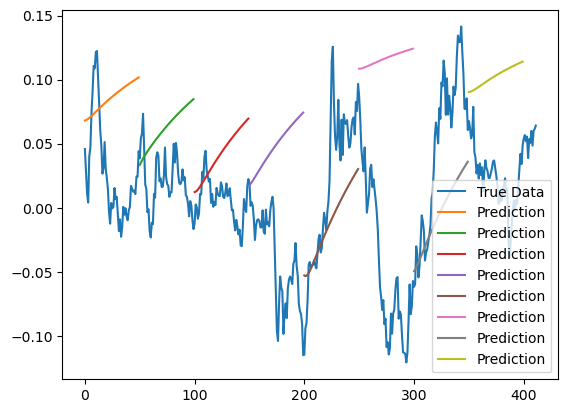

In [48]:
plot_results_multiple(predictions, y_test, 50)